In [12]:
from core.read_events import *
from core.utils import *
from Gaugi import stdvector2list, progressbar, GeV
from ROOT import kRed, kBlue, kBlack,TLine,kBird, kOrange,kGray, kYellow, kViolet, kGreen, kAzure
from ROOT import kBird,kBlackBody,gStyle
from pprint import pprint

import os
import json
import pandas as pd
import array
import numpy as np
import pickle
import itertools
import rootplotlib as rpl
rpl.set_lorenzetti_style()
rpl.suppress_root_warnings()
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt
from atlasify import atlasify


import atlas_mpl_style as ampl
ampl.use_atlas_style()
plt.rcParams['text.usetex'] = True


%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

os.makedirs('output', exist_ok=True)


Applying ATLAS style settings...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
basepath='/home/jodafons/public/cern_data/simulation/v1.0.1/time_analysis'

In [3]:
!ls /home/jodafons/public/cern_data/simulation/v1.0.1/time_analysis

electron.npy	 mb.npy			singleElectron25.npy  zee_mb.npy
electron_mb.npy  singleElectron10.npy	singleElectron5.npy
jets.npy	 singleElectron100.npy	singleElectron50.npy
jets_mb.npy	 singleElectron20.npy	zee.npy


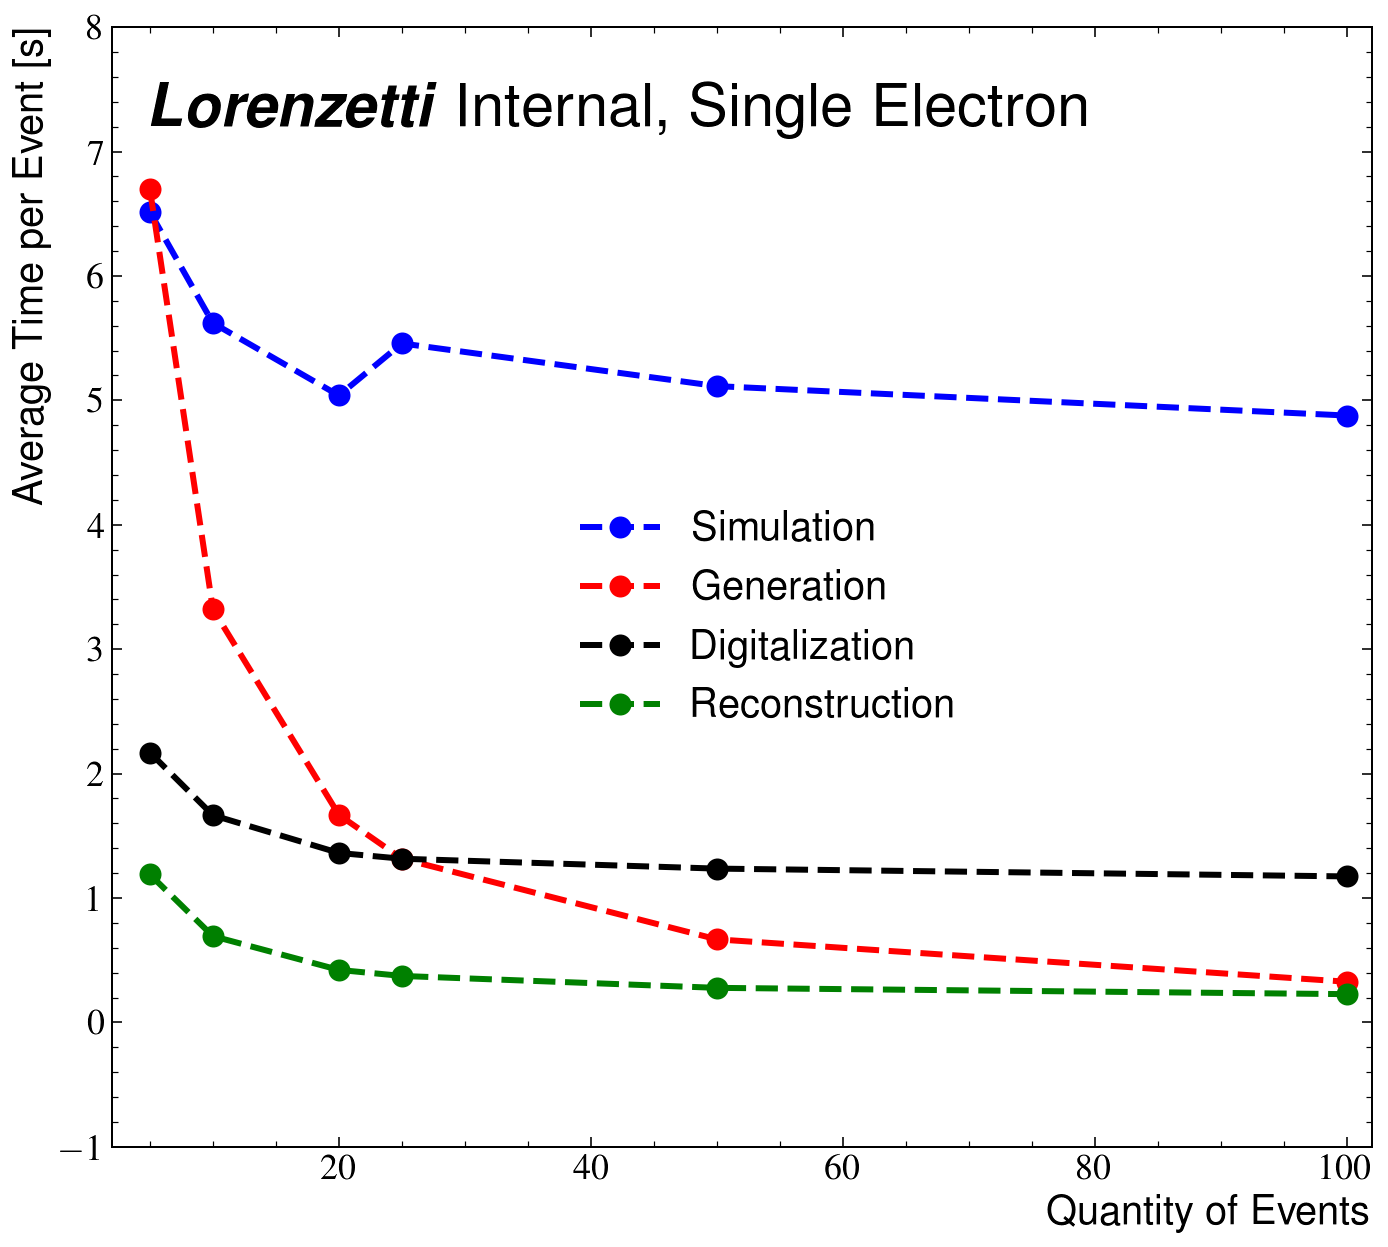

In [92]:
nevents = [5, 10, 20, 25, 50, 100]
steps = ['generation_electron','simu_electron','digit_electron','reco_electron']
simulation = []
generation = []
digit = []
reco = []

for n in nevents:
    f = basepath+'/singleElectron%d.npy'%n
    #print(f)
    data = np.load(f,allow_pickle='TRUE').item()
    generation.append(data['generation_electron'][0] / n)
    simulation.append(data['simu_electron'][0]/n)
    digit.append(data['digit_electron'][0] / n)
    reco.append(data['reco_electron'][0]/ n )
    
fig, ax = plt.subplots(figsize=(10,9))
plt.plot(nevents, simulation, color='b', linewidth=3, markersize=20, marker='.', linestyle='--',label='Simulation')
plt.plot(nevents, generation, color='r', linewidth=3, markersize=20, marker='.', linestyle='--', label='Generation')
plt.plot(nevents, digit, color='k', linewidth=3, markersize=20, marker='.', linestyle='--', label='Digitalization')
plt.plot(nevents, reco, color='g', linewidth=3, markersize=20, marker='.', linestyle='--', label='Reconstruction')
plt.xlabel('Quantity of Events', loc='right')
plt.ylabel('Average Time per Event [s]', loc='top')
#plt.grid()
plt.legend(bbox_to_anchor=(0.7,0.6),prop={'size': 20})
#plt.ylim((-0.2,1.2))
plt.xlim((2,102))
_label='Lorenzetti'
sim_str='Internal, Single Electron'
status_str=''
label = fr"\textbf{{\textit{{{_label}}}}} {sim_str}{status_str}"
ax.text(5, 7.2, label, fontsize=30)
plt.tight_layout() 
#plt.show()
plt.savefig('single_electron_time_per_event.pdf')
    

In [93]:
particles = ['electron','zee','jets','mb','electron_mb','zee_mb','jets_mb']
steps = ['generation', 'simulation','digitalization','reconstruction']
meanDict ={step: list() for step in steps}
stdDict = {step: list() for step in steps}

for particle in particles:
    data = np.load(basepath+'/'+particle+'.npy',allow_pickle='TRUE').item()
    for step in steps:
        eventValue = list()
        # if not data[step]: data[step] = [0.001 for i in range(10)]
        for value in data[step]:
            eventValue.append((value/10))
        meanDict[step].append(np.mean(eventValue))
        # stdDict[step].append(np.std(eventValue)
        
normDict = {step: list() for step in steps}
for idx, particle in enumerate(particles):
    for step in steps:
        if idx > 3:
            normDict[step].append(meanDict[step][idx]/meanDict['digitalization'][idx])
        else:
            normDict[step].append(meanDict[step][idx]/meanDict['simulation'][idx])

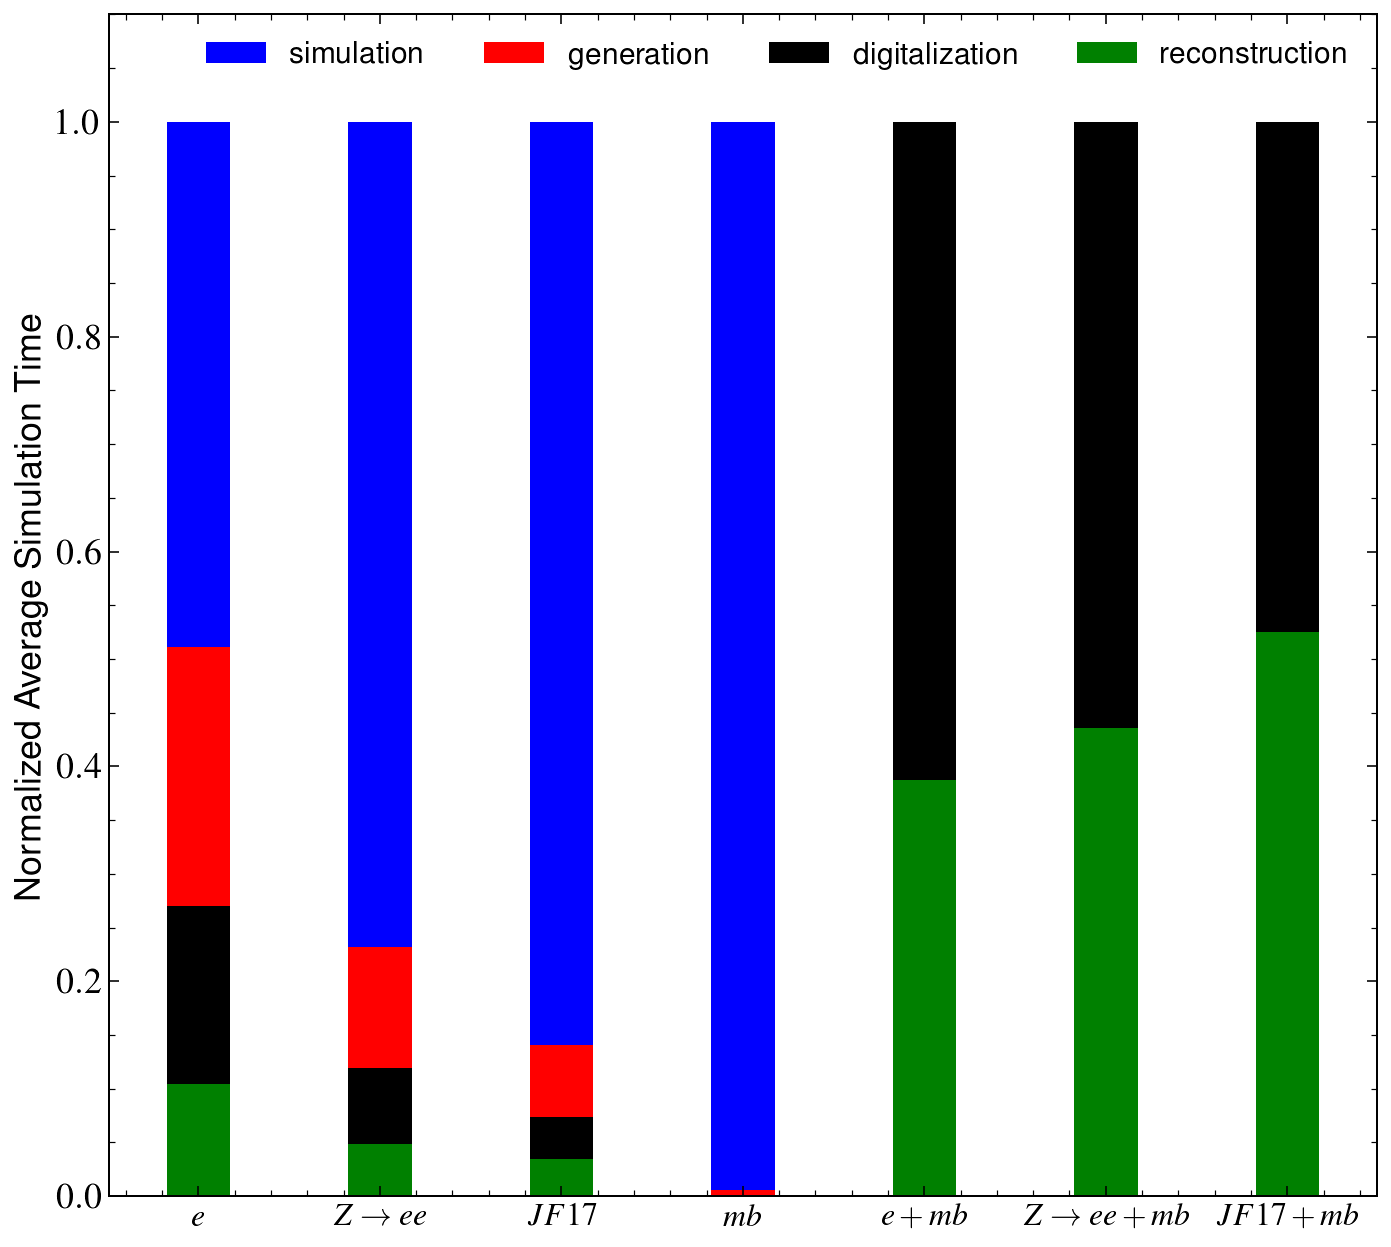

In [94]:
steps = ['simulation','generation','digitalization','reconstruction']
particles = ['$e$', r'$Z\rightarrow ee$', '$JF17$', '$mb$', '$e+mb$',
             r'$Z\rightarrow ee+mb$','$JF17+mb$']
colors = ['b','r','k','g']
fig, ax = plt.subplots(figsize=(10,9))
for idx, step in enumerate(steps):
    ax.bar(particles, normDict[step], width=0.35, label=step, color=colors[idx])
ax.set_ylabel('Normalized Average Simulation Time',fontsize=18)
ax.tick_params(axis='x',labelsize=18)
plt.legend()
plt.xticks(fontsize=16, multialignment='center')
#plt.yticks(fontsize=18)
plt.ylim((0,1.1))
ax.legend(prop={'size': 15}, ncol=4)



_label='Lorenzetti'
sim_str='Internal, Single Electron'
status_str=''
label = fr"\textbf{{\textit{{{_label}}}}} {sim_str}{status_str}"
#ax.text(0, 1.1, label, fontsize=30)
plt.tight_layout() 
#plt.show()
plt.savefig('normalized_time_per_data.pdf')

